# Visualization of Phase-Picks at NCI on ISC Events 


##  Fei Zhang
### October 2018

View seismic events, stations, and rays



In [1]:
import sys
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

In [2]:
# get the pst packages into PYTHONPATH 
# sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
#from seismic.traveltime.sort_rays import sort,sort2

In [3]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    #in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    in_pdf =  pd.read_csv(csvfile,  sep='\s+', header='infer') # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [4]:
# OR read in from already sorted (zoned) csv file
#inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
#inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'

inputcsv='/g/data/ha3/rakib/seismic/pst/tests/results/s_arrivals.txt'
inputcsv='/g/data/ha3/rakib/seismic/pst/tests/results/p_arrivals.txt'

inputpdf = csv2pdf(inputcsv)

In [5]:
inputpdf.shape

(2372317, 15)

In [6]:
inputpdf.head()

,#eventID,originTimestamp,originLon,originLat,net,sta,cha,pickTimestamp,stationLon,stationLat,baz,dist,ttResidual,snr,bandIndex
0,smi:ISC/evid=17330218,1.312236e+09,72.6074,37.8015,KZ,ABKAR,BHZ,1.312236e+09,59.9431,49.2558,325.402534,14.653967,4.959720,14.4,2
1,smi:ISC/evid=16916591,1.312235e+09,27.2487,35.5287,KZ,ABKAR,BHZ,1.312235e+09,59.9431,49.2558,49.977092,27.526046,0.788000,11.3,0
2,smi:ISC/evid=16916054,1.312229e+09,87.7188,33.9654,KZ,ABKAR,BHZ,1.312229e+09,59.9431,49.2558,315.014760,25.588974,3.687874,12.3,0
3,smi:ISC/evid=603829393,1.312211e+09,138.5220,34.6710,KZ,ABKAR,BHZ,1.312211e+09,59.9431,49.2558,310.534992,57.674101,2.300667,37.3,0
4,smi:ISC/evid=17223325,1.312210e+09,-175.3164,51.6810,KZ,ABKAR,BHZ,1.312210e+09,59.9431,49.2558,324.774959,68.978759,4.146172,27.0,1


In [7]:
inputpdf.columns


Index(['#eventID', 'originTimestamp', 'originLon', 'originLat', 'net', 'sta',
       'cha', 'pickTimestamp', 'stationLon', 'stationLat', 'baz', 'dist',
       'ttResidual', 'snr', 'bandIndex'],
      dtype='object')

In [8]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

# Begin to Visualize the data

In [9]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

# 1. Python Pandas package plot function (with basemap) 

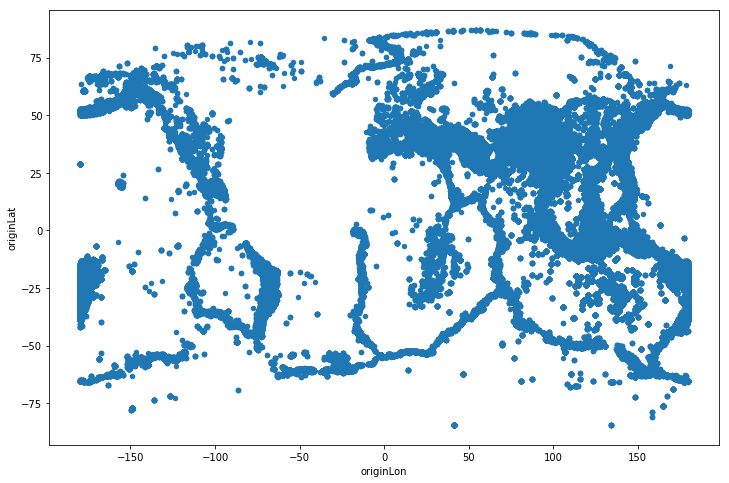

In [10]:
#plt.figure(); 
pdf2.plot.scatter(x='originLon', y='originLat',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

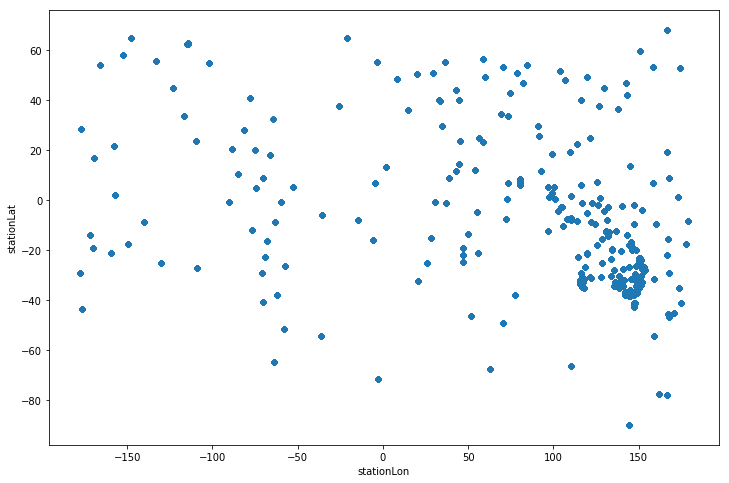

In [11]:
plt.figure(); pdf2.plot.scatter(x='stationLon', y='stationLat',figsize=(12,8))

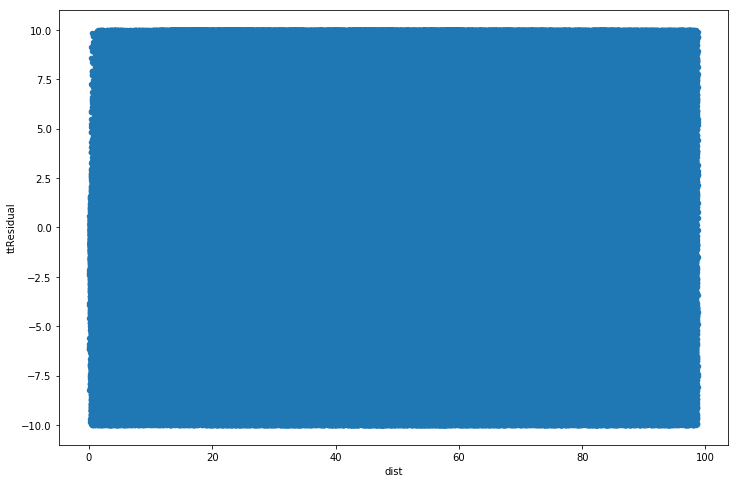

In [12]:
#plt.figure(); 
#pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))


pdf2.plot.scatter(x='dist', y='ttResidual',figsize=(12,8))

In [13]:
pdf2['observed_tt'] = pdf2.pickTimestamp - pdf2.originTimestamp

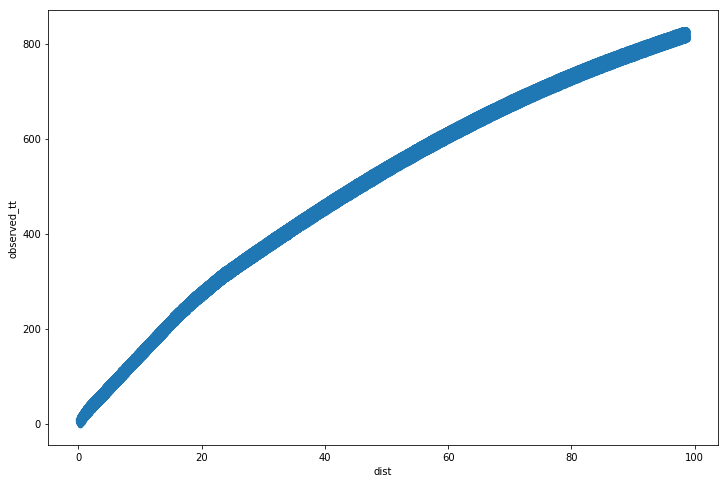

In [14]:
pdf2.plot.scatter(x='dist', y='observed_tt',figsize=(12,8))

In [15]:
pdf2.shape

(2372317, 16)

# 3. Geopandas and Maps

In [16]:
import geopandas as gpd

In [17]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [18]:
event_locations = [Point(xy) for xy in zip(pdf2.originLon, pdf2.originLat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

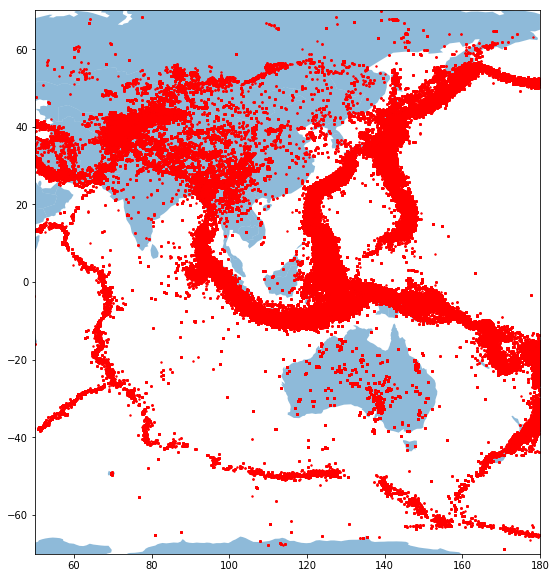

In [19]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
myax2=geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [20]:
station_locations = [Point(xy) for xy in zip(pdf2.stationLon, pdf2.stationLat)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf['station'] =station_locations

In [21]:
# geopdf.plot(ax=myax2, marker='o', color='red', markersize=2)
# geopandas included shape datasets
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# myax=world.plot(alpha=0.5,  figsize=(20, 20))

# myax.set_xlim([-180,180])
# myax.set_ylim([-70,70])
              
geopdf.set_geometry('station').plot(ax=myax, marker='^', color='black', markersize=4);
#geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

<Figure size 432x288 with 0 Axes>

In [22]:
geopdf.geometry.name

'geometry'

In [23]:
geopdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2372317 entries, 0 to 2372316
Data columns (total 18 columns):
#eventID           object
originTimestamp    float64
originLon          float64
originLat          float64
net                object
sta                object
cha                object
pickTimestamp      float64
stationLon         float64
stationLat         float64
baz                float64
dist               float64
ttResidual         float64
snr                float64
bandIndex          int64
observed_tt        float64
geometry           object
station            object
dtypes: float64(11), int64(1), object(6)
memory usage: 325.8+ MB


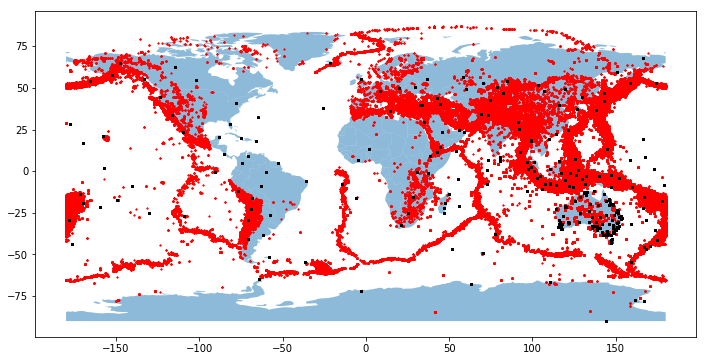

In [24]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(12, 6))
# Add layer of polygons on the axis
world.plot(ax=ax, alpha=0.5,  figsize=(20, 10))

geopdf.plot(ax=ax, marker='*', color='red', markersize=2)
geop2= geopdf.set_geometry('station')
geop2.plot(ax=ax, marker='^', color='black', markersize=4)
plt.savefig('Swave_events_stations.png')

# Display
#plt.show()

In [25]:
geopdf.head()

,#eventID,originTimestamp,originLon,originLat,net,sta,cha,pickTimestamp,stationLon,stationLat,baz,dist,ttResidual,snr,bandIndex,observed_tt,geometry,station
0,smi:ISC/evid=17330218,1.312236e+09,72.6074,37.8015,KZ,ABKAR,BHZ,1.312236e+09,59.9431,49.2558,325.402534,14.653967,4.959720,14.4,2,203.335,POINT (72.6074 37.8015),POINT (59.9431 49.2558)
1,smi:ISC/evid=16916591,1.312235e+09,27.2487,35.5287,KZ,ABKAR,BHZ,1.312235e+09,59.9431,49.2558,49.977092,27.526046,0.788000,11.3,0,346.930,POINT (27.2487 35.5287),POINT (59.9431 49.2558)
2,smi:ISC/evid=16916054,1.312229e+09,87.7188,33.9654,KZ,ABKAR,BHZ,1.312229e+09,59.9431,49.2558,315.014760,25.588974,3.687874,12.3,0,326.700,POINT (87.7188 33.9654),POINT (59.9431 49.2558)
3,smi:ISC/evid=603829393,1.312211e+09,138.5220,34.6710,KZ,ABKAR,BHZ,1.312211e+09,59.9431,49.2558,310.534992,57.674101,2.300667,37.3,0,588.565,POINT (138.522 34.671),POINT (59.9431 49.2558)
4,smi:ISC/evid=17223325,1.312210e+09,-175.3164,51.6810,KZ,ABKAR,BHZ,1.312210e+09,59.9431,49.2558,324.774959,68.978759,4.146172,27.0,1,660.995,POINT (-175.3164 51.681),POINT (59.9431 49.2558)


In [26]:
geop2.head()



,#eventID,originTimestamp,originLon,originLat,net,sta,cha,pickTimestamp,stationLon,stationLat,baz,dist,ttResidual,snr,bandIndex,observed_tt,geometry,station
0,smi:ISC/evid=17330218,1.312236e+09,72.6074,37.8015,KZ,ABKAR,BHZ,1.312236e+09,59.9431,49.2558,325.402534,14.653967,4.959720,14.4,2,203.335,POINT (72.6074 37.8015),POINT (59.9431 49.2558)
1,smi:ISC/evid=16916591,1.312235e+09,27.2487,35.5287,KZ,ABKAR,BHZ,1.312235e+09,59.9431,49.2558,49.977092,27.526046,0.788000,11.3,0,346.930,POINT (27.2487 35.5287),POINT (59.9431 49.2558)
2,smi:ISC/evid=16916054,1.312229e+09,87.7188,33.9654,KZ,ABKAR,BHZ,1.312229e+09,59.9431,49.2558,315.014760,25.588974,3.687874,12.3,0,326.700,POINT (87.7188 33.9654),POINT (59.9431 49.2558)
3,smi:ISC/evid=603829393,1.312211e+09,138.5220,34.6710,KZ,ABKAR,BHZ,1.312211e+09,59.9431,49.2558,310.534992,57.674101,2.300667,37.3,0,588.565,POINT (138.522 34.671),POINT (59.9431 49.2558)
4,smi:ISC/evid=17223325,1.312210e+09,-175.3164,51.6810,KZ,ABKAR,BHZ,1.312210e+09,59.9431,49.2558,324.774959,68.978759,4.146172,27.0,1,660.995,POINT (-175.3164 51.681),POINT (59.9431 49.2558)


In [27]:
stop

NameError: name 'stop' is not defined

# Plot Arrival Rays (takes a few minutes to run)

In [ ]:
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.originLon, x.originLat), 
                (x.stationLon, x.stationLat)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')

In [ ]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

mymap.set_xlim([-180,180])
mymap.set_ylim([-80,80])

# mymap.set_xlim([50,180])
# mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)